In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
     

/Users/sherya/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
loan_dataset = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv')

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
loan_dataset.head()
     

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [5]:
loan_dataset.shape
     

(613, 13)

In [6]:
loan_dataset.describe()

,5849,0.1,Unnamed: 8,360,1
count,613.000000,613.000000,592.000000,599.000000,563.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,85.587325,65.170672,0.365142
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [7]:
loan_dataset.isnull().sum()

LP001002       0
Male          13
No             3
0             15
Graduate       0
No.1          32
5849           0
0.1            0
Unnamed: 8    21
360           14
1             50
Urban          0
Y              0
dtype: int64

In [8]:
loan_dataset = loan_dataset.dropna()
     

In [9]:
loan_dataset.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True)

In [10]:
loan_dataset.head()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [17]:
loan_dataset['Graduate'].value_counts()

Graduate
Graduate        383
Not Graduate     97
Name: count, dtype: int64

In [18]:
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)
     

In [19]:
loan_dataset['Graduate'].value_counts()

Graduate
Graduate        383
Not Graduate     97
Name: count, dtype: int64

<Axes: xlabel='Graduate', ylabel='count'>

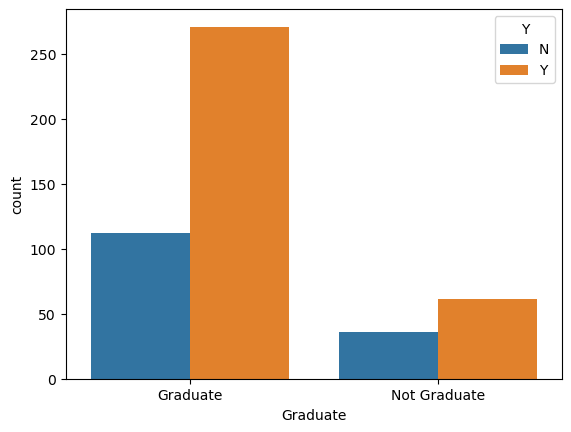

In [21]:
sns.countplot(x='Graduate', hue='Y', data=loan_dataset)

<Axes: xlabel='Male', ylabel='count'>

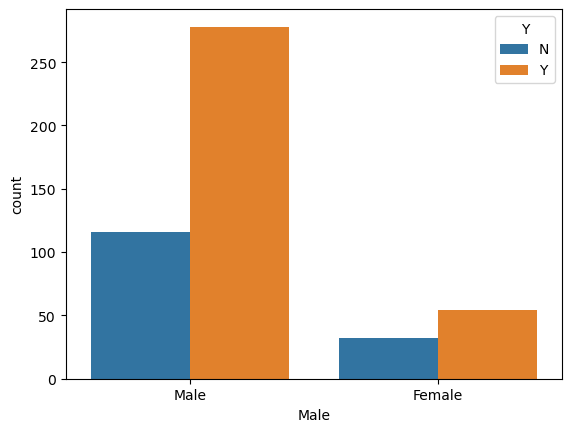

In [22]:
sns.countplot(x='Male', hue='Y', data=loan_dataset)

In [28]:
loan_dataset.replace({'Male':{'Male':0,'Female':1}, 'No':{'Yes':1,'No':0}, 'Graduate:{'Graduate':1,'Not Graduate':0}, 'Urban':{'Rural':0,'Urban':1}, inplace=False)

SyntaxError: unterminated string literal (detected at line 1) (4105441860.py, line 1)

In [29]:
loan_dataset.head()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [38]:
X = loan_dataset.drop(columns=['LP001002','360','1','0.1','0','5849'], axis=1)
Y = loan_dataset['Y']

In [32]:
print(X,Y)

     LP001002    Male   No      Graduate No.1  Unnamed: 8      Urban  Y
0    LP001003    Male  Yes      Graduate   No       128.0      Rural  N
1    LP001005    Male  Yes      Graduate  Yes        66.0      Urban  Y
2    LP001006    Male  Yes  Not Graduate   No       120.0      Urban  Y
3    LP001008    Male   No      Graduate   No       141.0      Urban  Y
4    LP001011    Male  Yes      Graduate  Yes       267.0      Urban  Y
..        ...     ...  ...           ...  ...         ...        ... ..
608  LP002978  Female   No      Graduate   No        71.0      Rural  Y
609  LP002979    Male  Yes      Graduate   No        40.0      Rural  Y
610  LP002983    Male  Yes      Graduate   No       253.0      Urban  Y
611  LP002984    Male  Yes      Graduate   No       187.0      Urban  Y
612  LP002990  Female   No      Graduate  Yes       133.0  Semiurban  N

[480 rows x 8 columns] 0      N
1      Y
2      Y
3      Y
4      Y
      ..
608    Y
609    Y
610    Y
611    Y
612    N
Name: Y, Leng

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, stratify=Y, random_state=2)

In [40]:
print(X.shape, X_train.shape,X_test.shape)

(480, 7) (432, 7) (48, 7)


In [42]:
classifier = svm.SVC(kernel='linear')

In [43]:
classifier.fit(X_train,Y_train)

ValueError: could not convert string to float: 'Female'

In [44]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

ValueError: could not convert string to float: 'Female'

In [46]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

ValueError: could not convert string to float: 'Male'

In [47]:
print('Accuracy on test data : ', test_data_accuracy)

NameError: name 'test_data_accuracy' is not defined